In [70]:
import Axelrod_Sim as axel
import Strategy as st
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.preprocessing import LabelEncoder




In [88]:
Payoff_Matrix = np.array([                      
    [3, 0, -4],
    [5, 1, -4],
    [0, 0, -2],
])

Generations = 500
Months = 12

In [35]:
def Generate_H2h_Matrix(Time, Payoff_Matrix):
    #Generates a matrix of head to head values between strategies
    Strats = st.Get_All_Strats()
    H2H_Matrix = []
    Player_Results = []
    X = 0
    for Result in axel.Full_Game(Time, Payoff_Matrix)[1]: 
        Player_Results.append(Result[0])
        X += 1
        if X == len(Strats):
            H2H_Matrix.append(Player_Results)
            X = 0
            Player_Results = []
    return(np.array(H2H_Matrix))



In [36]:
def Get_Fitness(Payoff_Matrix, population):
    Fitness_Vec = []
    for x in range(len(Payoff_Matrix[0])):
        Fitness = 0
        for y in range(len(Payoff_Matrix[0])):
            if y == x:
                Fitness += (population[y]-1)*(Payoff_Matrix[x])[y]
            else:
                Fitness += population[y]*(Payoff_Matrix[x])[y]
        Fitness = Fitness/(np.sum(population)-1)
        Fitness_Vec.append(np.exp(2 * Fitness))
    return(np.array(Fitness_Vec))

In [37]:
def Run_Sim(Time, Payoff_Matrix, Generations):
    #runs the moran process simulation
    H2H_Matrix = Generate_H2h_Matrix(Time, Payoff_Matrix)
    Population = []
    Selection_Values_Duplication = np.zeros(len(H2H_Matrix[0]))
    Selection_Values_Removal = np.zeros(len(H2H_Matrix[0]))
    for x in range(len(H2H_Matrix[1])):
        Population.append(2)
    Population = np.array(Population)
    Population_Over_Time = [0 for b in range(Generations)]
    for x in range(Generations):
        Fitness = Get_Fitness(H2H_Matrix, Population)
        for i in range(len(H2H_Matrix[0])):
            Selection_Values_Duplication[i] = ((Population[i]) * Fitness[i])/((np.sum(Population * Fitness)))
        for k in range(len(H2H_Matrix[0])):
            Selection_Values_Removal[k] = (Population[k])/np.sum(Population)
        Moran_Selection_Duplication = random.choice([b for b in range(len(Population))], p=Selection_Values_Duplication, size=(1))[0]
        Moran_Selection_Removal = random.choice([l for l in range(len(Population))], p=Selection_Values_Removal, size=(1))[0]
        Population[int(Moran_Selection_Duplication)] = Population[int(Moran_Selection_Duplication)] + 1
        Population[int(Moran_Selection_Removal)] = Population[int(Moran_Selection_Removal)] - 1
        Population_Over_Time[x] = Population.tolist()
    return(Population_Over_Time)
    

In [38]:
def Display_Results(Data, Generations):
    Names = st.Get_All_Names()
    colour = iter(cm.rainbow(np.linspace(0, 1, len(Data[0]))))
    x = [i for i in range(Generations)]
    for k in range(len(Data[0])):
        c = next(colour)
        y = [(Data[i])[k] for i in range(Generations)]
        plt.plot(x, y, color = c, label = Names[k])
    plt.xlabel("Generations")
    plt.ylabel("Population")

    plt.legend(bbox_to_anchor=(1.1, 1.05))

    plt.show

In [39]:
def Run_Sim_Get_Winner(Time, Payoff_Matrix, Generations):
    #runs the moran process simulation
    H2H_Matrix = Generate_H2h_Matrix(Time, Payoff_Matrix)
    Selection_Values_Duplication = np.zeros(len(H2H_Matrix[0]))
    Selection_Values_Removal = np.zeros(len(H2H_Matrix[0]))
    Population = []
    for x in range(len(H2H_Matrix[1])):
        Population.append(2)
    Population = np.array(Population)
    for x in range(Generations):
        Fitness = Get_Fitness(H2H_Matrix, Population)
        for i in range(len(H2H_Matrix[0])):
            Selection_Values_Duplication[i] = ((Population[i]) * Fitness[i])/((np.sum(Population * Fitness)))
        for k in range(len(H2H_Matrix[0])):
            Selection_Values_Removal[k] = (Population[k])/np.sum(Population)
        Moran_Selection_Duplication = random.choice([b for b in range(len(Population))], p=Selection_Values_Duplication, size=(1))[0]
        Moran_Selection_Removal = random.choice([l for l in range(len(Population))], p=Selection_Values_Removal, size=(1))[0]
        Population[int(Moran_Selection_Duplication)] = Population[int(Moran_Selection_Duplication)] + 1
        Population[int(Moran_Selection_Removal)] = Population[int(Moran_Selection_Removal)] - 1
    Final_Pop = [Finish for Finish in Population]
    Winner = Final_Pop.index(max(Final_Pop))
    return(Winner)
    

In [48]:
def Plot_Winner_Bar(Results):
    Non_Zero_Results = []
    Non_Zero_Names = []
    Names = st.Get_All_Names()
    for L in range(len(Results)):
        if Results[L] != 0:
            Non_Zero_Results.append(Results[L])
            Non_Zero_Names.append(Names[L])
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(15)
    plt.bar(Non_Zero_Names, Non_Zero_Results)
    plt.plot
    plt.legend(bbox_to_anchor=(1.1, 1.05))

    plt.show

def Get_Average_Result(Months, Payoff_Matrix, Generations):
    #Gets an average result from the 
    Results = [0 for i in range(len((st.Get_All_Names())))]
    for x in range(10):
        K = Run_Sim_Get_Winner(Months, Payoff_Matrix, Generations)
        Results[K] = Results[K] + 1
    return(Results)
   #colour = iter(cm.rainbow(np.linspace(0, 1, len(Names))))


    

            


In [93]:
def Plot_Sensitivity_Analysis(Names_Of_Winners, Names_Of_Runnerups, Names_Of_Third):
    f = plt.figure()
    f.set_figwidth(10)
    f.set_figheight(10)
    font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
    plt.rc('font', **font)
    x_coo = [Count for Count in range(101)]
    plt.xlabel("Loss from reporting")
    plt.ylabel("Winning Strategy")
    plt.scatter(x_coo, Names_Of_Winners, color = 'Blue', label = 'Winner')
    plt.scatter(x_coo, Names_Of_Runnerups, color = 'Green', label = 'Runner Up')
    #plt.scatter(x_coo, Names_Of_Third, color = 'Red', label = 'Third Place')
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.plot

def Sensitivity_Analysis(Months, Generations):
    Names_Of_Winners = []
    Names_Of_Runnerups = []
    Names_Of_Third_Place = []
    Names = st.Get_All_Names()
    for x in range(101):
        Payoff_Matrix = np.array([                      
         [3, 0, -x],
        [5, 1, -x],
        [0, 0, -x/2],])
        Results_At_X = Get_Average_Result(Months, Payoff_Matrix, Generations)
        Winner_At_X = Results_At_X.index(max(Results_At_X))
        Names_Of_Winners.append(Names[Winner_At_X])
        Results_At_X[Winner_At_X] = 0
        Runnerup_At_X = Results_At_X.index(max(Results_At_X))
        Names_Of_Runnerups.append(Results_At_X[Runnerup_At_X])
        Results_At_X[Runnerup_At_X]  = 0
        Third_At_X = Results_At_X.index(max(Results_At_X))
        #if Results_At_X[Third_At_X] == 0:
            #Names_Of_Third_Place.append("None")
        #else:
         #Names_Of_Third_Place.append(Names[Third_At_X])
    return(Names_Of_Winners, Names_Of_Runnerups, Names_Of_Third_Place)
    


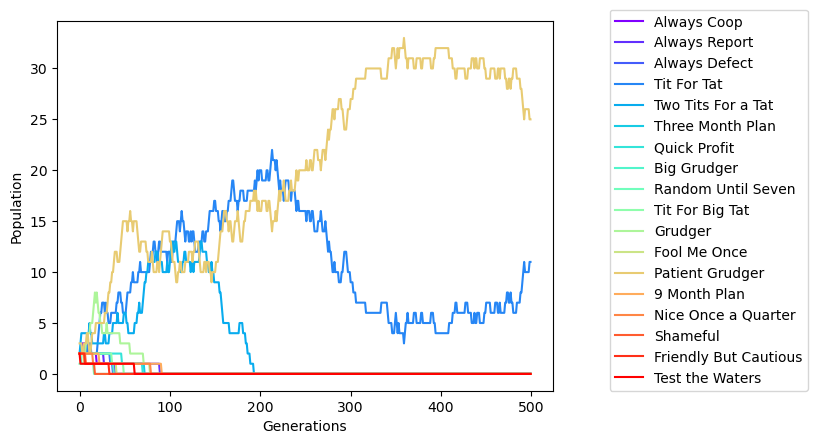

In [ ]:
Moran_Sim_Result = Run_Sim(Months, Payoff_Matrix, Generations)
Display_Results(Moran_Sim_Result, Generations)
#This runs once, but due to stochasticity it often produces a different result each time.

In [31]:
axel.Show_Player_Scores(Months, Payoff_Matrix)

Tit For Big Tat 5.0
Fool Me Once -31.5
Always Report -75.0
Quick Profit -91.0
Three Month Plan -183.0
Big Grudger -198.0
Always Coop -201.0
Friendly But Cautious -318.0
9 Month Plan -328.0
Grudger -396.0
Two Tits For a Tat -408.0
Tit For Tat -411.0
Patient Grudger -418.0
Test the Waters -476.0
Random Until Seven -634.5
Shameful -752.0
Always Defect -796.0
Nice Once a Quarter -866.0
[[36.0, 36.0, 'Always Coop', 'Always Coop'], [-75.0, 0.0, 'Always Coop', 'Always Report'], [0.0, 60.0, 'Always Coop', 'Always Defect'], [36.0, 36.0, 'Always Coop', 'Tit For Tat'], [36.0, 36.0, 'Always Coop', 'Two Tits For a Tat'], [-72.0, 8.0, 'Always Coop', 'Three Month Plan'], [-75.0, 5.0, 'Always Coop', 'Quick Profit'], [36.0, 36.0, 'Always Coop', 'Big Grudger'], [-69.0, 31.0, 'Always Coop', 'Random Until Seven'], [36.0, 36.0, 'Always Coop', 'Tit For Big Tat'], [36.0, 36.0, 'Always Coop', 'Grudger'], [36.0, 36.0, 'Always Coop', 'Fool Me Once'], [36.0, 36.0, 'Always Coop', 'Patient Grudger'], [-48.0, 37.0,

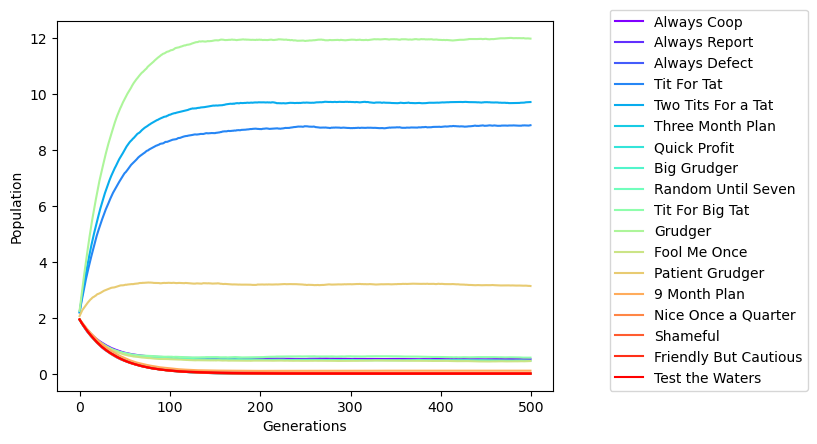

In [10]:
Get_Average_Result(Months, Payoff_Matrix, Generations)

C:\Users\hefos\AppData\Local\Temp\ipykernel_3916\2730918847.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.1, 1.05))


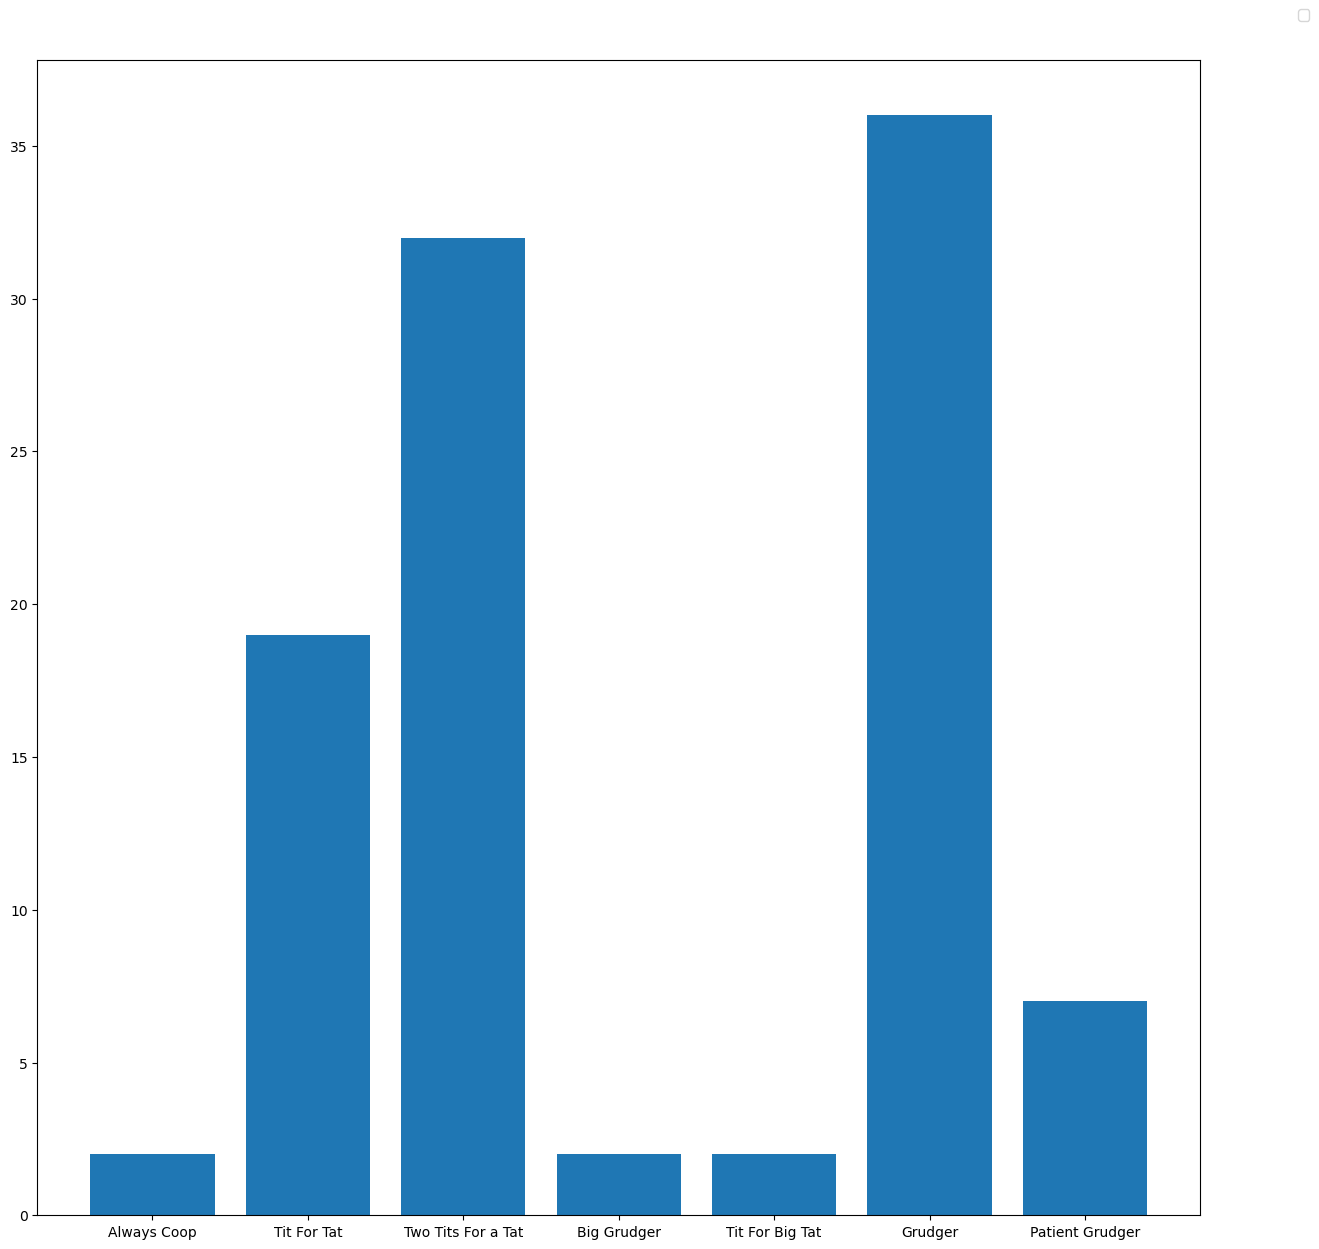

In [ ]:
Payoff_Matrix = np.array([                      
    [3, 0, -4],
    [5, 1, -4],
    [0, 0, -2],
])
Plot_Winner_Bar(Get_Average_Result(Months, Payoff_Matrix, Generations))


C:\Users\hefos\AppData\Local\Temp\ipykernel_19148\2730918847.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.1, 1.05))


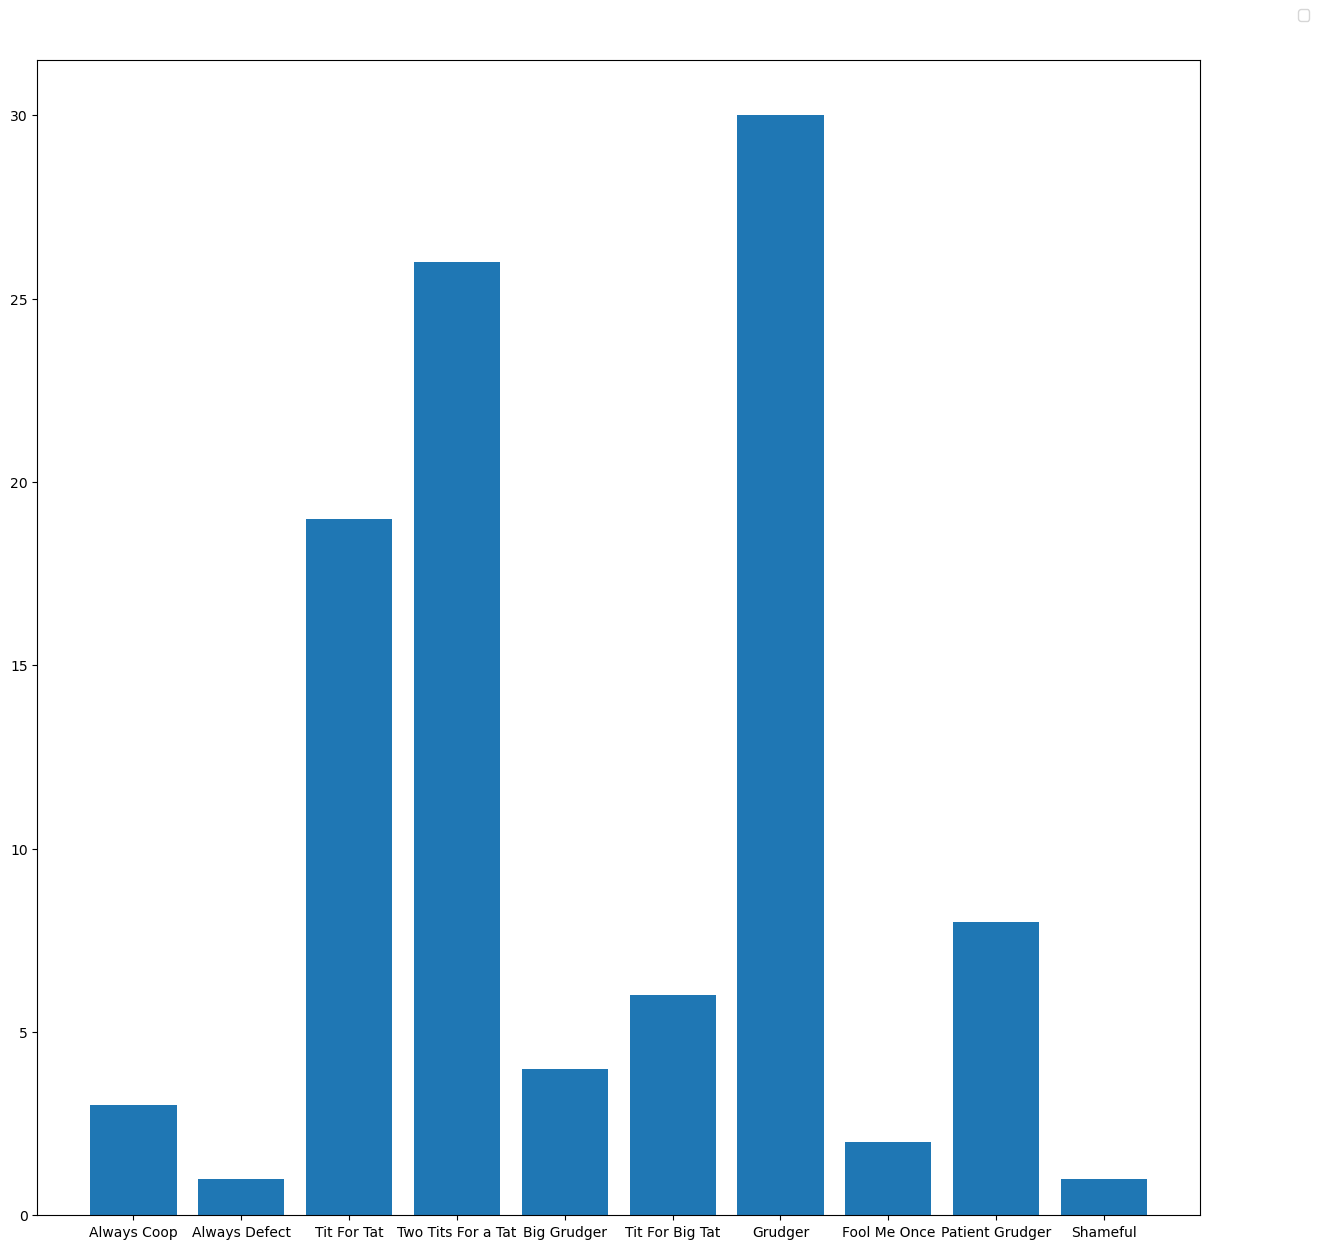

In [ ]:
Payoff_Matrix = np.array([                      
    [3, 0, -10],
    [5, 1, -10],
    [0, 0, -5],
])
Plot_Winner_Bar(Get_Average_Result(Months, Payoff_Matrix, Generations))

C:\Users\hefos\AppData\Local\Temp\ipykernel_19148\2730918847.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.1, 1.05))


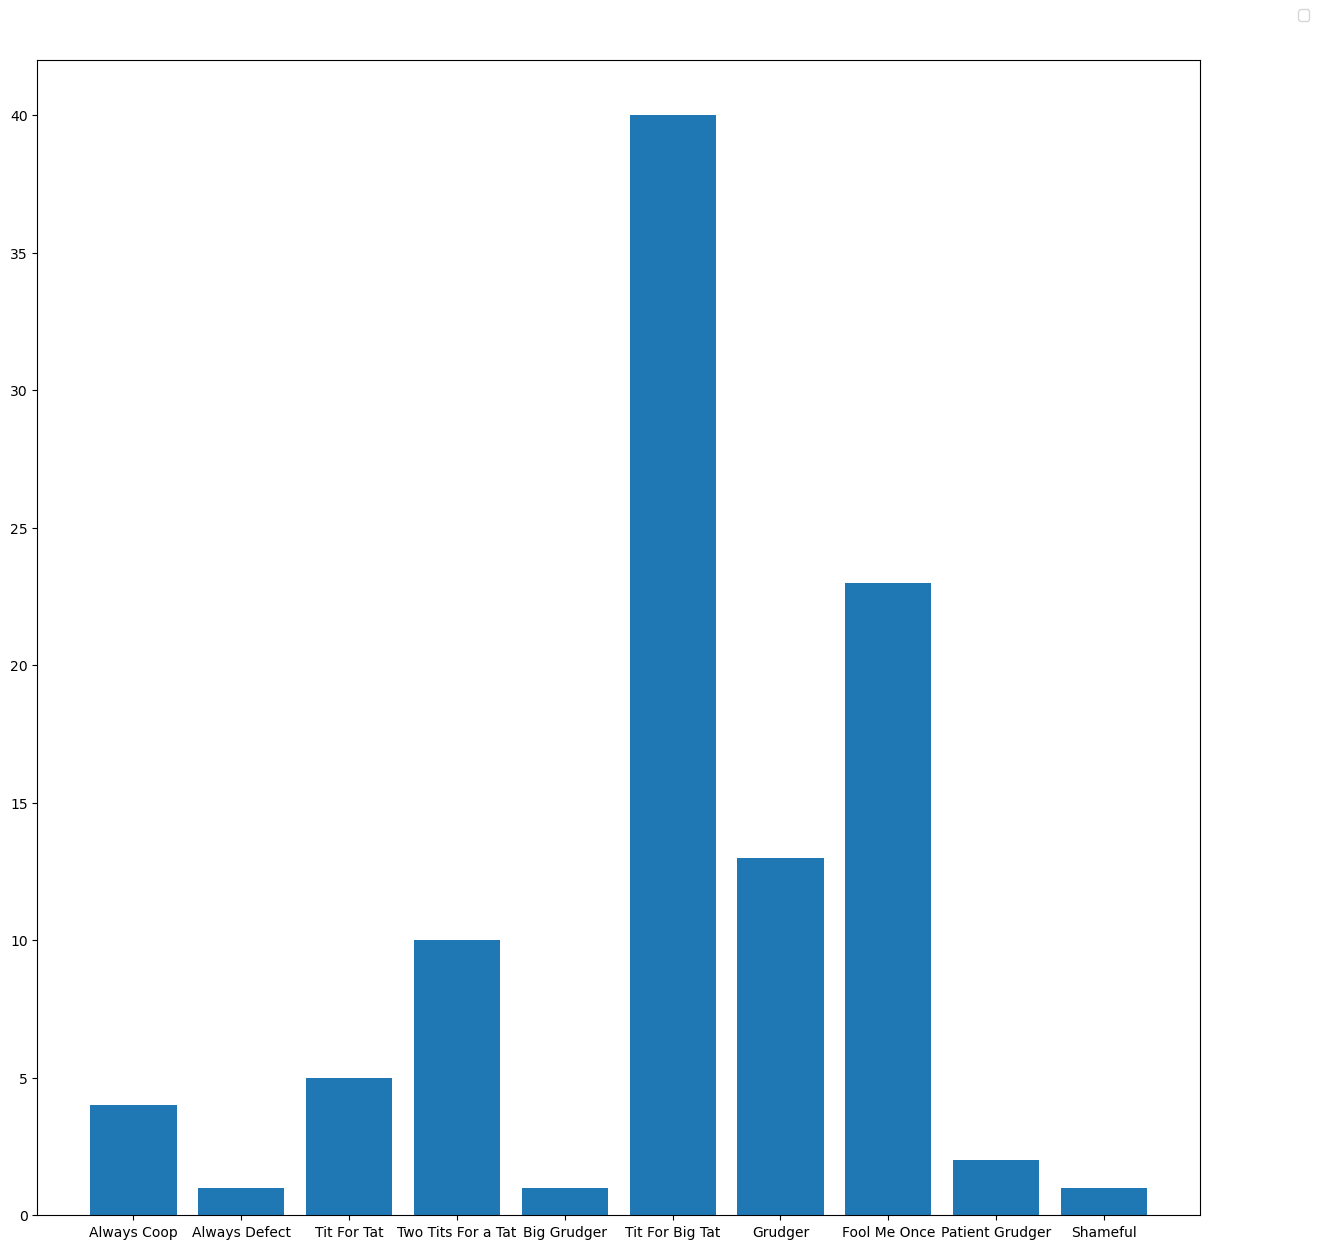

In [ ]:
Payoff_Matrix = np.array([                      
    [3, 0, -50],
    [5, 1, -50],
    [0, 0, -25],
])
Plot_Winner_Bar(Results = Get_Average_Result(Months, Payoff_Matrix, Generations))


In [16]:
Sensitivity_Analysis(Months, Generations)

['Two Tits For a Tat', 'Grudger', 'Grudger', 'Two Tits For a Tat', 'Two Tits For a Tat', 'Grudger', 'Grudger', 'Grudger', 'Grudger', 'Grudger', 'Grudger', 'Grudger', 'Two Tits For a Tat', 'Two Tits For a Tat', 'Grudger', 'Tit For Big Tat', 'Tit For Big Tat', 'Tit For Big Tat', 'Tit For Big Tat', 'Tit For Big Tat', 'Tit For Big Tat', 'Tit For Big Tat', 'Tit For Big Tat', 'Tit For Big Tat', 'Tit For Big Tat', 'Tit For Big Tat', 'Tit For Big Tat', 'Tit For Big Tat', 'Tit For Big Tat', 'Tit For Big Tat', 'Tit For Big Tat', 'Tit For Big Tat', 'Tit For Big Tat', 'Tit For Big Tat', 'Tit For Big Tat', 'Tit For Big Tat', 'Tit For Big Tat', 'Tit For Big Tat', 'Tit For Big Tat', 'Tit For Big Tat', 'Tit For Big Tat', 'Tit For Big Tat', 'Tit For Big Tat', 'Tit For Big Tat', 'Tit For Big Tat', 'Tit For Big Tat', 'Tit For Big Tat', 'Tit For Big Tat', 'Tit For Big Tat', 'Tit For Big Tat', 'Tit For Big Tat']


C:\Users\hefos\AppData\Local\Temp\ipykernel_17416\1351023431.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.1, 1.05))


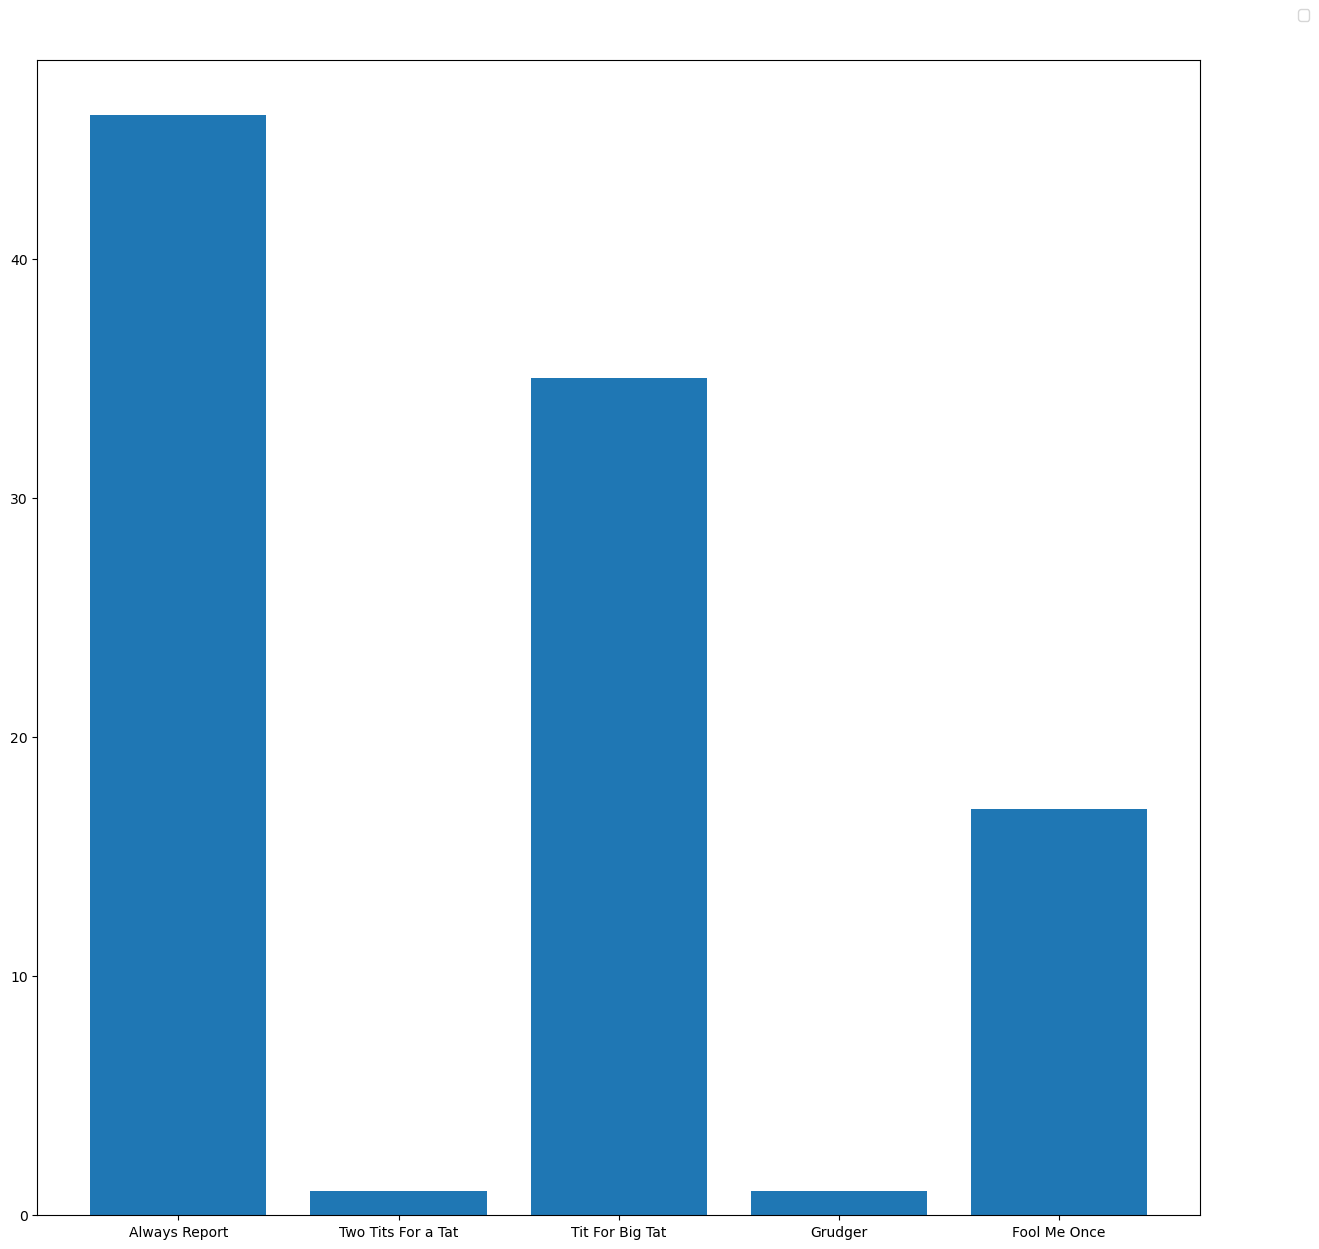

In [27]:
Plot_Winner_Bar(Get_Average_Result(Months, Payoff_Matrix, Generations))

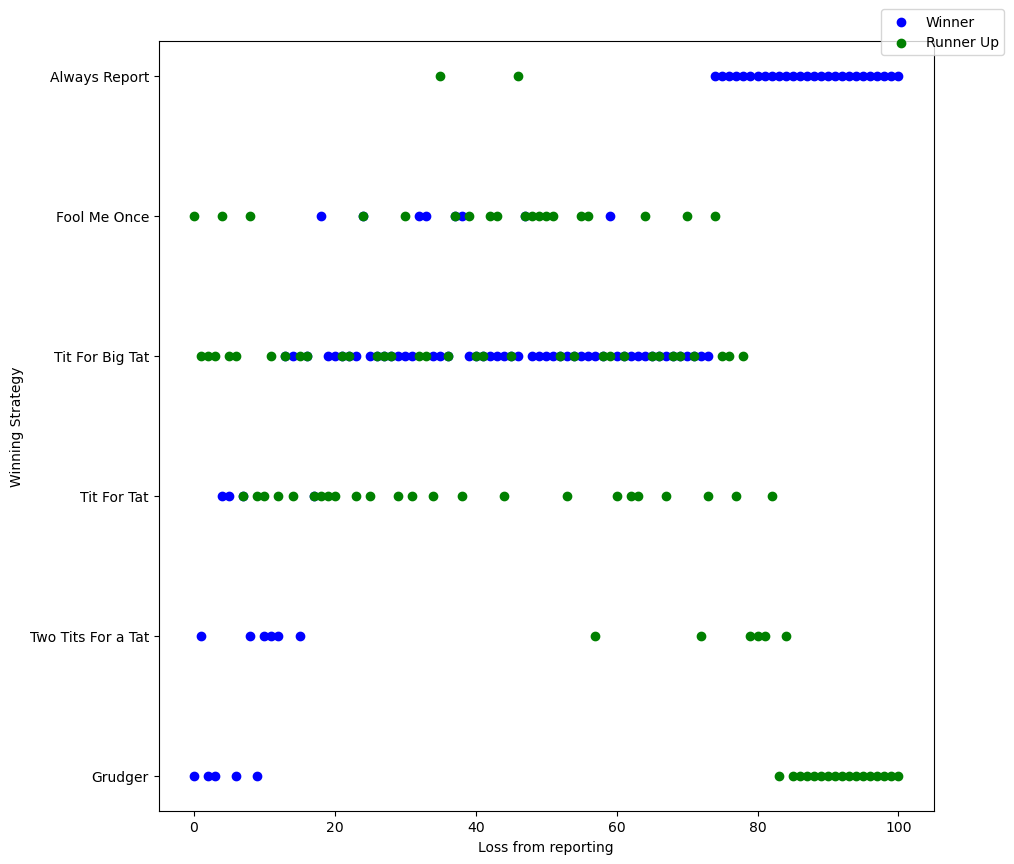

In [92]:
Result =Sensitivity_Analysis(Months, Generations)
Plot_Sensitivity_Analysis(Result[0], Result[1], Result[2])

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

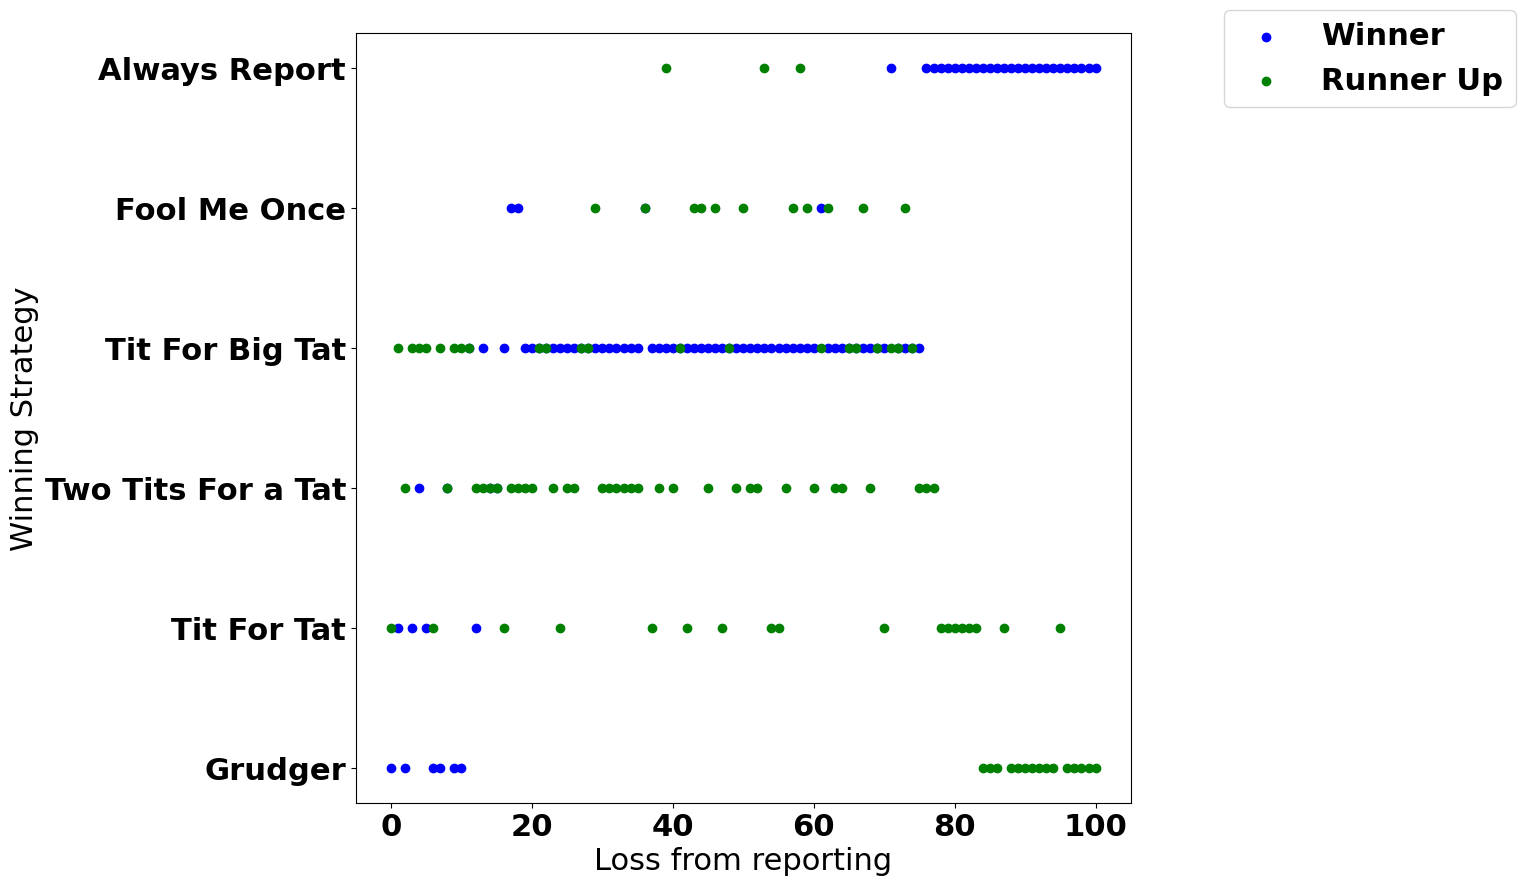

In [94]:
Result =Sensitivity_Analysis(Months, Generations)
Plot_Sensitivity_Analysis(Result[0], Result[1], Result[2])